<H1> NBA Player Data Clusttering </H1>
<h3> By: Ryan Moore </h3>

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [177]:
df = pd.read_csv('/Users/Ryan/Code/Data645/players_stats_by_season_full_details.csv')

<h2> Exploratory Analysis </h2>

In [178]:
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,351,756,840,271,171,105,518,623,231,112,84,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,387,593,773,261,119,71,483,554,651,125,77,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,243,534,702,252,181,107,266,373,501,142,82,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,121,536,586,149,208,80,540,620,218,70,79,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,301,439,541,233,187,78,313,391,365,113,20,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

In [180]:
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
count,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36774.000000,36912.000000,33919.000000,33919.000000
mean,31.401083,781.178506,117.838268,254.699648,30.616969,87.107876,57.238484,77.404980,49.160162,72.323978,35.362544,94.218106,129.580650,65.333424,27.635372,10.383735,323.544060,1987.492549,197.165827,209.275332,94.955836
std,16.112989,470.295971,91.730585,191.015086,30.658528,80.451297,53.446822,68.662186,34.383808,40.288340,35.028300,78.806687,109.112397,67.823130,20.710504,16.272083,248.591981,4.913384,8.630686,25.669331,11.643626
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,160.000000,130.000000,59.000000
25%,22.000000,476.000000,57.000000,131.000000,7.000000,25.000000,23.000000,32.000000,26.000000,44.000000,13.000000,44.000000,59.000000,24.000000,13.000000,1.000000,160.000000,1984.000000,191.000000,190.000000,86.000000
50%,31.000000,726.000000,99.000000,217.000000,23.000000,71.000000,44.000000,61.000000,43.000000,69.000000,25.000000,75.000000,102.000000,45.000000,23.000000,5.000000,275.000000,1988.000000,198.000000,207.000000,94.000000
75%,38.000000,983.200000,151.000000,323.000000,45.000000,126.000000,75.000000,102.000000,65.000000,93.000000,47.000000,120.000000,166.000000,84.000000,37.000000,13.000000,417.000000,1991.000000,203.000000,225.000000,102.000000
max,83.000000,3239.300000,857.000000,1941.000000,402.000000,1028.000000,756.000000,916.000000,464.000000,332.000000,440.000000,848.000000,1247.000000,907.000000,191.000000,269.000000,2818.000000,2002.000000,229.000000,375.000000,170.000000


<h3> Preprocessing </h3>

In [181]:
#Drop the Euroleague by only selecting players that played in the NBA. 
df_nba1 = df[(df['League'] == 'NBA').reset_index(drop=True)]

#Drop attempt stats to leave only makes and drop ORB and DRB to leave only REB
df_nba2 = df_nba1.drop(['FGA', '3PA', 'FTA', 'ORB', 'DRB'], axis=1)

#Drop player information stats and none performance stats
df_nba = df_nba2.drop(['GP',  'MIN', 'birth_year', 'height_cm', 'weight', 'weight_kg'], axis =1)

df_nba.describe()

,FGM,3PM,FTM,TOV,PF,REB,AST,STL,BLK,PTS
count,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.00000
mean,203.289557,44.155591,95.131065,70.975211,102.045622,223.659283,117.585970,39.715981,25.268987,545.86577
std,179.047188,54.483722,105.782806,65.465216,73.885553,208.162226,137.441745,35.680967,32.347052,488.06519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,39.000000,2.000000,17.000000,13.000000,24.000000,44.000000,19.000000,8.000000,4.000000,105.00000
50%,172.000000,18.000000,60.000000,58.000000,107.000000,176.000000,71.000000,33.000000,14.000000,454.00000
75%,316.250000,74.250000,135.000000,108.000000,161.250000,328.250000,161.000000,61.000000,33.000000,843.00000
max,857.000000,402.000000,756.000000,464.000000,332.000000,1247.000000,907.000000,191.000000,269.000000,2818.00000


<h3> Visualizations </h3>

Text(0.5, 1.0, 'Histogram: Field Goals Made')

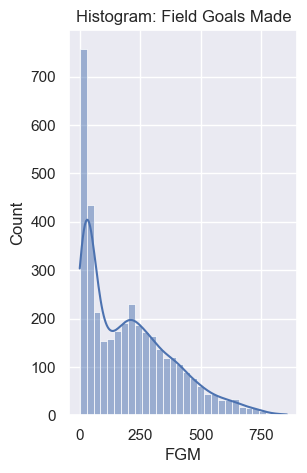

In [182]:
#Plot Histogram of Games Played
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df_nba['FGM'], kde=True, bins=30)
plt.title('Histogram: Field Goals Made')

Text(0.5, 1.0, 'Histogram: 3 Pointers Made')

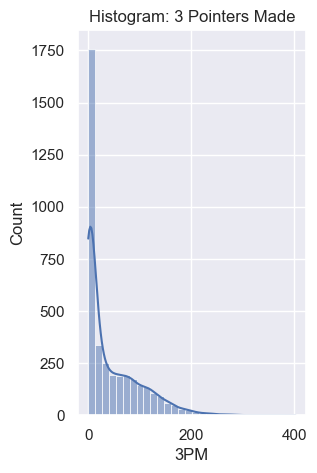

In [183]:
#Plot Histogram of 3 Pointers Made
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df_nba['3PM'], kde=True, bins=30)
plt.title('Histogram: 3 Pointers Made')

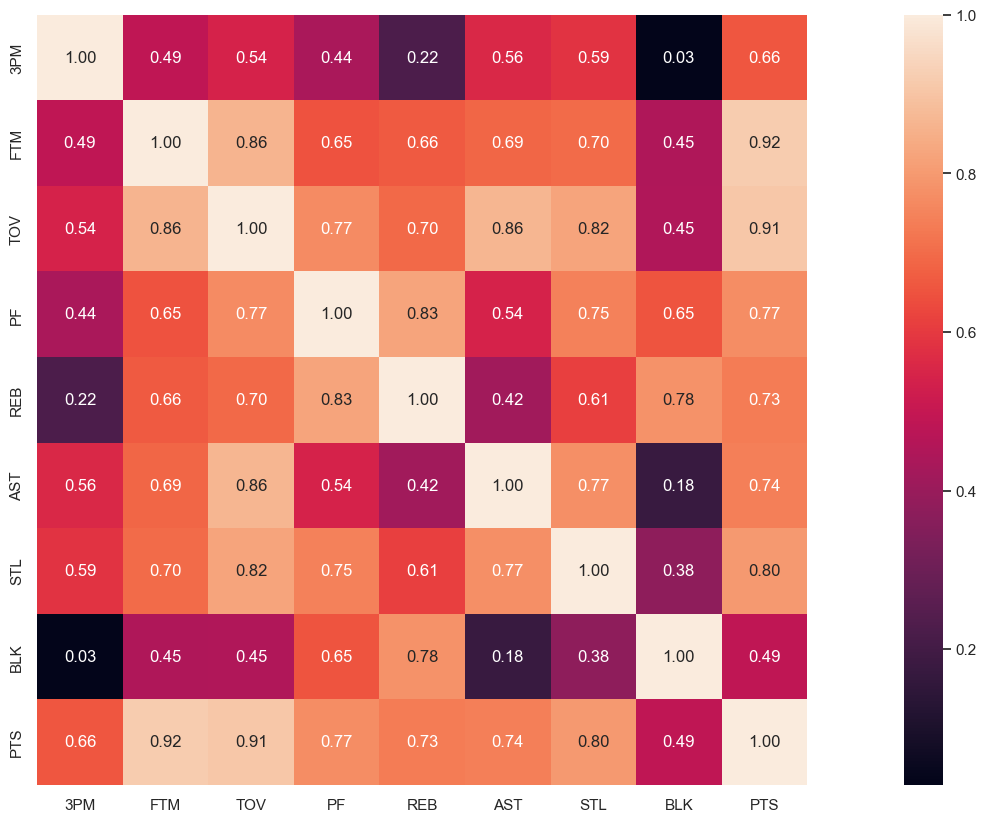

In [184]:
#Make dataframe that only contains numeric data types
df_numeric = df_nba.select_dtypes(include=np.number)
correlation_matrix = df_numeric.columns.values[1:]

#correlation matrix visualization
plt.figure(figsize=(25,10))
cm = np.corrcoef(df_nba[correlation_matrix].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=correlation_matrix, xticklabels=correlation_matrix)
plt.show()


<H3> Cluster Development </h3>

In [185]:
#Use the correlation matrix to help with clustering
X = df_numeric[correlation_matrix]

In [186]:
#Scale the data
Scaling = preprocessing.StandardScaler()
X_std = Scaling.fit_transform(X)
X_std

array([[ 1.53909213,  6.24823746,  3.05583915, ...,  2.02610967,
         1.81589219,  3.94698965],
       [ 1.55744865,  4.7071411 ,  2.90306613, ...,  2.39049763,
         1.59946062,  3.50846581],
       [ 0.52948317,  4.14932095,  2.76557041, ...,  2.86700495,
         1.7540546 ,  3.07199114],
       ...,
       [-0.79218675, -0.83324211, -1.05375514, ..., -1.02914317,
        -0.75036787, -1.08988702],
       [-0.77383022, -0.86160584, -1.02320054, ..., -1.02914317,
        -0.75036787, -1.09398537],
       [-0.81054327, -0.87106042, -1.03847784, ..., -1.05717301,
        -0.75036787, -1.10423126]])

In [187]:
#Cluster using KMeans and 5 clusters
kmeans = KMeans(n_clusters = 5, random_state=42, n_init=1000)
kmeans.fit(X_std)

KMeans(n_clusters=5, n_init=1000, random_state=42)

In [188]:
#Create Cluster Column 
df_numeric['cluster'] = kmeans.predict(X_std)
df_numeric.head()

,FGM,3PM,FTM,TOV,PF,REB,AST,STL,BLK,PTS,cluster
0,794,128,756,271,171,623,231,112,84,2472,4
1,768,129,593,261,119,554,651,125,77,2258,4
2,719,73,534,252,181,373,501,142,82,2045,4
3,720,51,536,149,208,620,218,70,79,2027,4
4,716,99,439,233,187,391,365,113,20,1970,4


<h3> Results </h3>

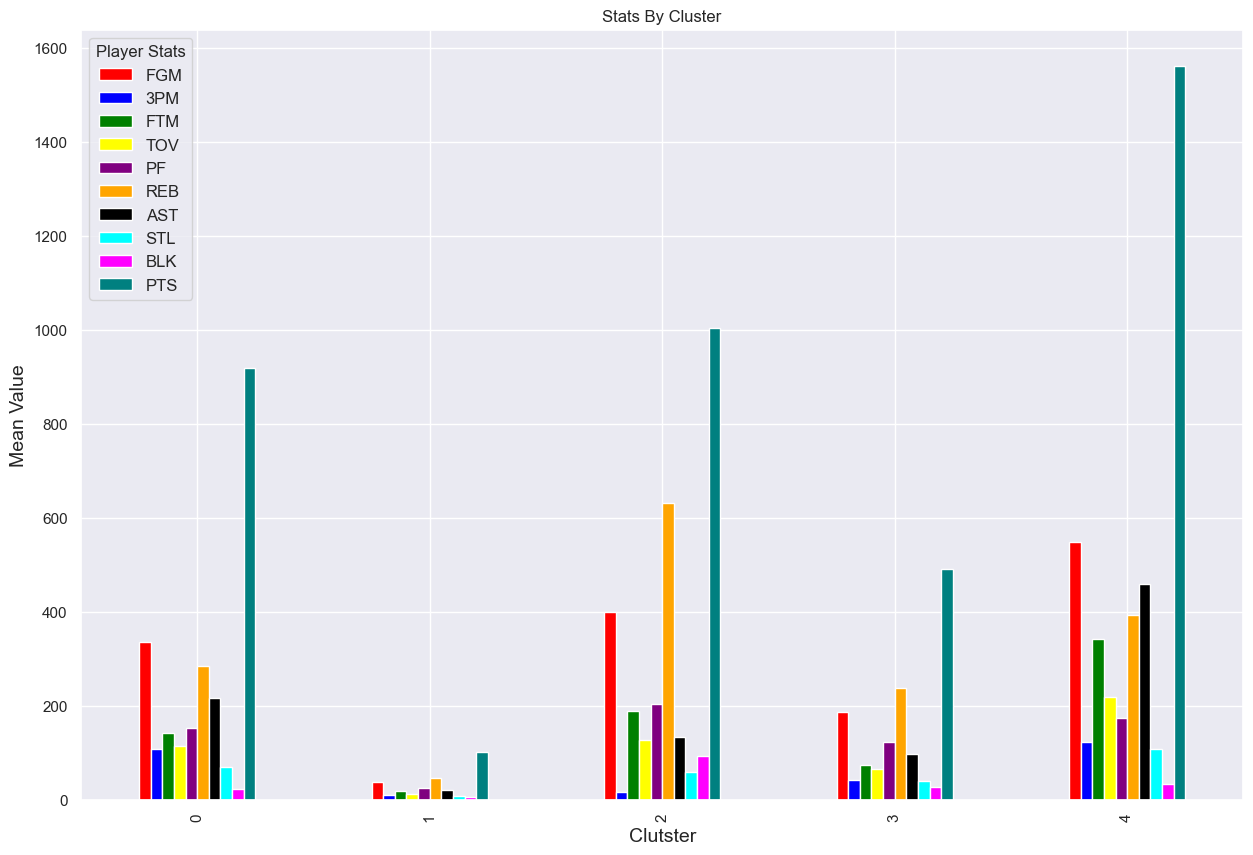

In [189]:
colors = ['red','blue','green','yellow', 'purple','orange','black', 'cyan', 'magenta','teal']

data_plot = df_numeric
data_plot.groupby("cluster").aggregate("mean").plot.bar(figsize=(15,10), color = colors)
plt.title("Stats By Cluster")
plt.xlabel('Clutster', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.legend(title='Player Stats', loc='upper left', fontsize=12)

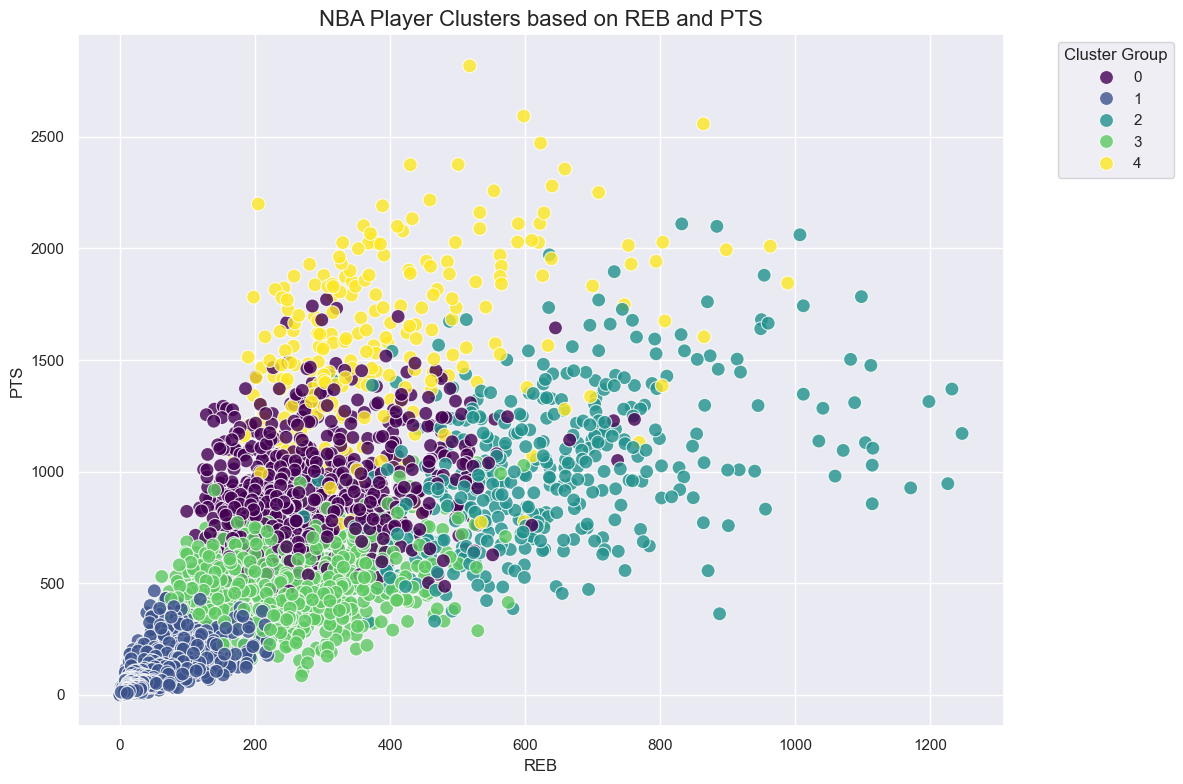

In [190]:
x_feature = 'REB' # Feature for the X-axis
y_feature = 'PTS' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

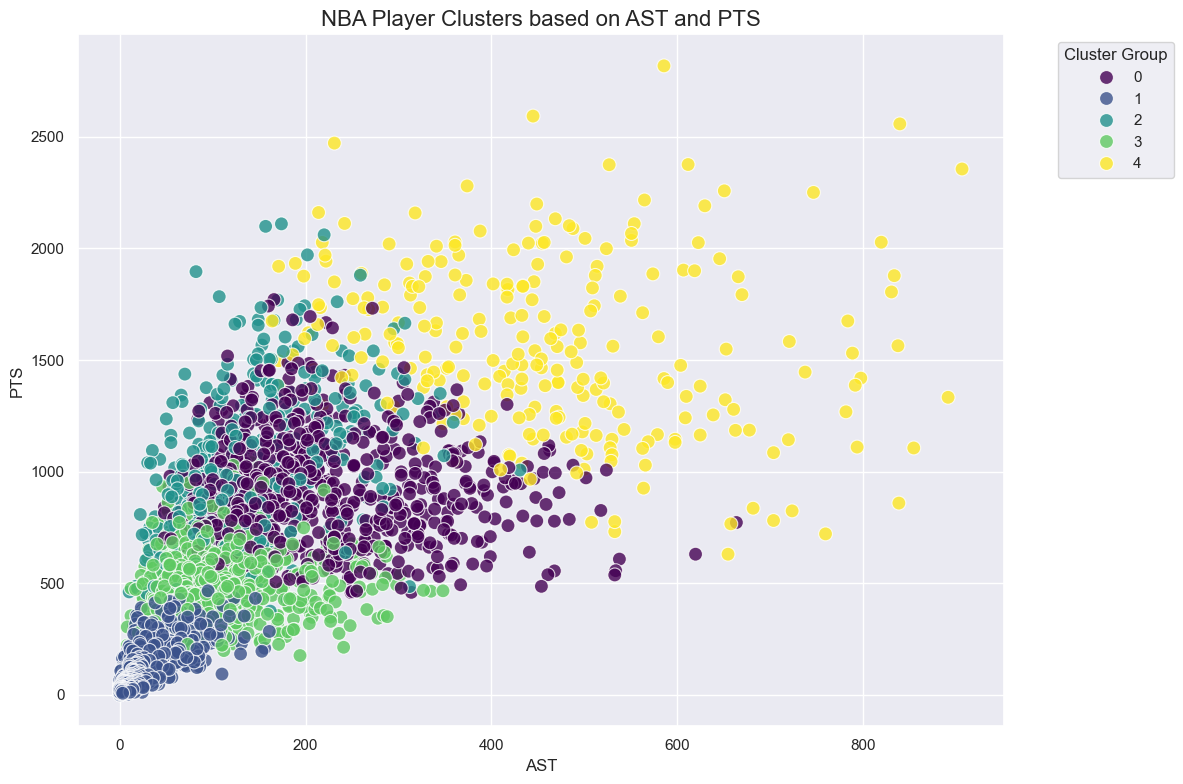

In [191]:
x_feature = 'AST' # Feature for the X-axis
y_feature = 'PTS' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

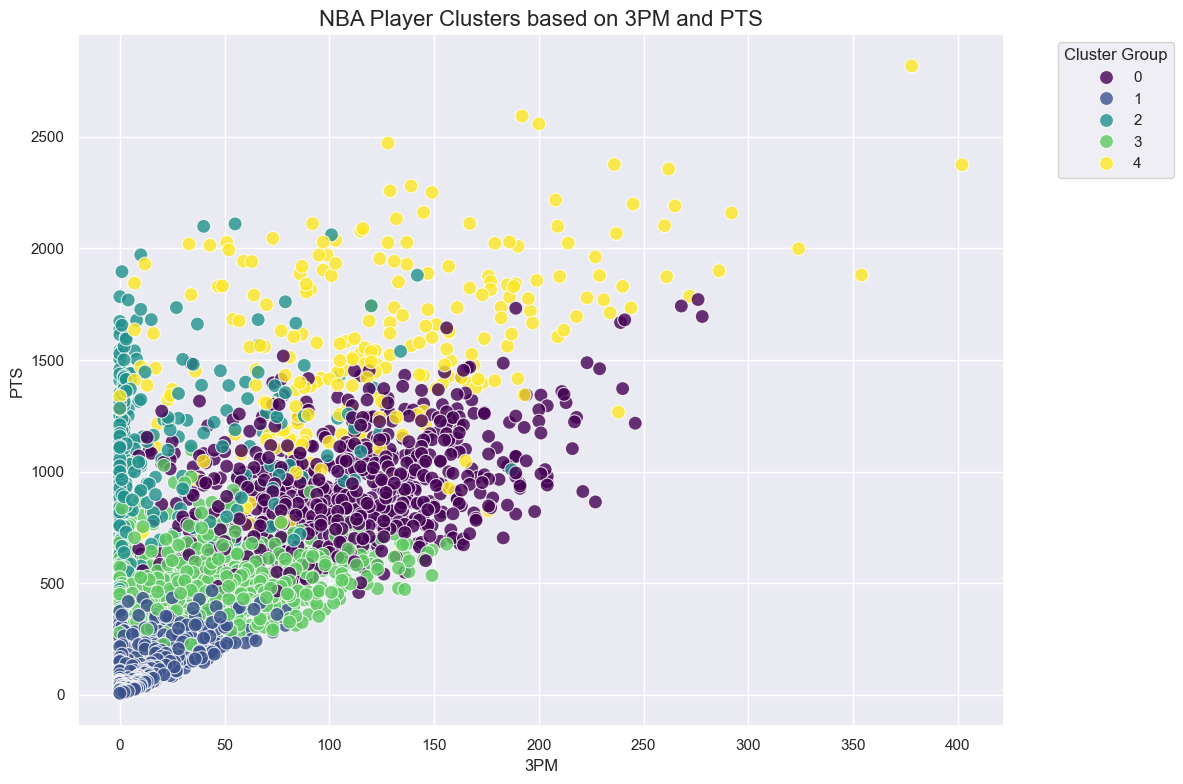

In [193]:
x_feature = '3PM' # Feature for the X-axis
y_feature = 'PTS' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

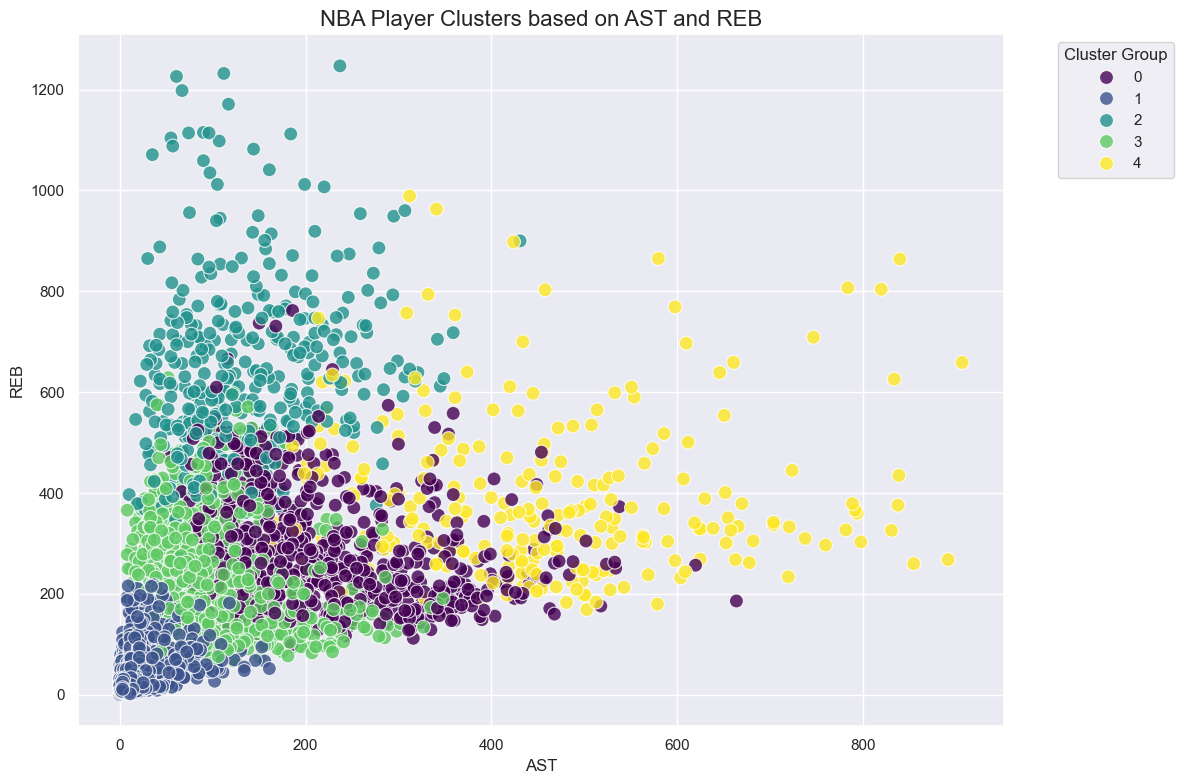

In [194]:
x_feature = 'AST' # Feature for the X-axis
y_feature = 'REB' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()